In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
from pathlib import Path
sys.path.append('..')

import pickle
import json

# Script params

In [3]:
max_len = 250
embedding_dim = 32

# Load train and test data

In [4]:
from keras.utils import pad_sequences

2023-08-24 23:46:27.836429: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_train_df.pkl', 'rb') as f:
    train_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/corpus_test_df.pkl', 'rb') as f:
    test_df = pickle.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/token2index.json', 'r') as f:
    token2index = json.load(f)
with open('/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/aclImdb/index2token.json', 'r') as f:
    index2token = json.load(f)

In [6]:
max_index = max(list(token2index.values())) + 1

In [7]:
x_train = pad_sequences(train_df.token_indexes.values, maxlen = max_len)
y_train = train_df.labels.values
x_test = pad_sequences(test_df.token_indexes.values, maxlen = max_len)
y_test = test_df.labels.values

In [8]:
x_train.shape, y_train.shape

((25000, 250), (25000,))

In [9]:
x_test.shape, y_test.shape

((25000, 250), (25000,))

# Training simple dnn with embedding layer

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Conv1D, MaxPooling1D, LSTM, BatchNormalization, Bidirectional
from keras.metrics import AUC, BinaryAccuracy
from keras.optimizers import RMSprop

In [11]:
model = Sequential()
model.add(Embedding(max_index, embedding_dim))
model.add(Conv1D(32, 3, activation = 'relu'))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.1))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

2023-08-24 23:46:34.657439: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-24 23:46:34.658804: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-24 23:46:34.661430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [12]:
optimizer = RMSprop(learning_rate=0.0001, momentum = 0.3)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=[BinaryAccuracy(), AUC()])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          554944    
                                                                 
 conv1d (Conv1D)             (None, None, 32)          3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 32)         0         
 )                                                               
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 8)                 5

In [14]:
fit_history = model.fit(x_train,
                        y_train,
                        epochs=15,
                        batch_size=64,
                        validation_data=(x_test, y_test)
                       )

Epoch 1/15


2023-08-24 23:46:35.515160: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-24 23:46:35.516500: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-24 23:46:35.518362: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - ETA: 0s - loss: 0.6930 - binary_accuracy: 0.5101 - auc: 0.5134

2023-08-24 23:47:02.379542: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-08-24 23:47:02.380561: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-08-24 23:47:02.382305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

391/391 [==============================] - 33s 76ms/step - loss: 0.6930 - binary_accuracy: 0.5101 - auc: 0.5134 - val_loss: 0.6925 - val_binary_accuracy: 0.5774 - val_auc: 0.5432
Epoch 2/15
391/391 [==============================] - 30s 76ms/step - loss: 0.6889 - binary_accuracy: 0.5788 - auc: 0.6157 - val_loss: 0.6691 - val_binary_accuracy: 0.7290 - val_auc: 0.8512
Epoch 3/15
391/391 [==============================] - 29s 73ms/step - loss: 0.5605 - binary_accuracy: 0.7490 - auc: 0.8219 - val_loss: 0.4520 - val_binary_accuracy: 0.8299 - val_auc: 0.8975
Epoch 4/15
391/391 [==============================] - 28s 71ms/step - loss: 0.3904 - binary_accuracy: 0.8450 - auc: 0.9125 - val_loss: 0.3602 - val_binary_accuracy: 0.8489 - val_auc: 0.9273
Epoch 5/15
391/391 [==============================] - 29s 73ms/step - loss: 0.3100 - binary_accuracy: 0.8834 - auc: 0.9410 - val_loss: 0.3234 - val_binary_accuracy: 0.8639 - val_auc: 0.9375
Epoch 6/15
391/391 [==============================] - 28s 72m

In [15]:
from kst.plots.BasePlots import BasePlots, ScatterPlot
import pandas as pd
from plotnine import aes, geom_point, geom_line, ylim, labs, theme

In [16]:
df = pd.DataFrame.from_dict(fit_history.history)
df['epoch'] = df.index.to_list()
df

,loss,binary_accuracy,auc,val_loss,val_binary_accuracy,val_auc,epoch
0,0.692951,0.51012,0.513434,0.692510,0.57744,0.543217,0
1,0.688893,0.57880,0.615743,0.669126,0.72900,0.851221,1
2,0.560532,0.74896,0.821922,0.452009,0.82988,0.897468,2
3,0.390419,0.84496,0.912540,0.360212,0.84892,0.927278,3
4,0.310003,0.88344,0.941040,0.323361,0.86388,0.937530,4
5,0.268738,0.90208,0.954718,0.325275,0.86700,0.936854,5
6,0.240762,0.91744,0.962657,0.317124,0.86856,0.940813,6
7,0.216475,0.92700,0.969341,0.331558,0.87012,0.938662,7
8,0.193779,0.93788,0.974576,0.339993,0.86828,0.939443,8
9,0.173979,0.94564,0.978938,0.340460,0.86696,0.939824,9


In [17]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'loss', 'color':"'training'"},
                 main_title='Binary crossentropy',
                 x_label='Epoch',
                 y_label='Loss',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_loss', color = "'validation'")))

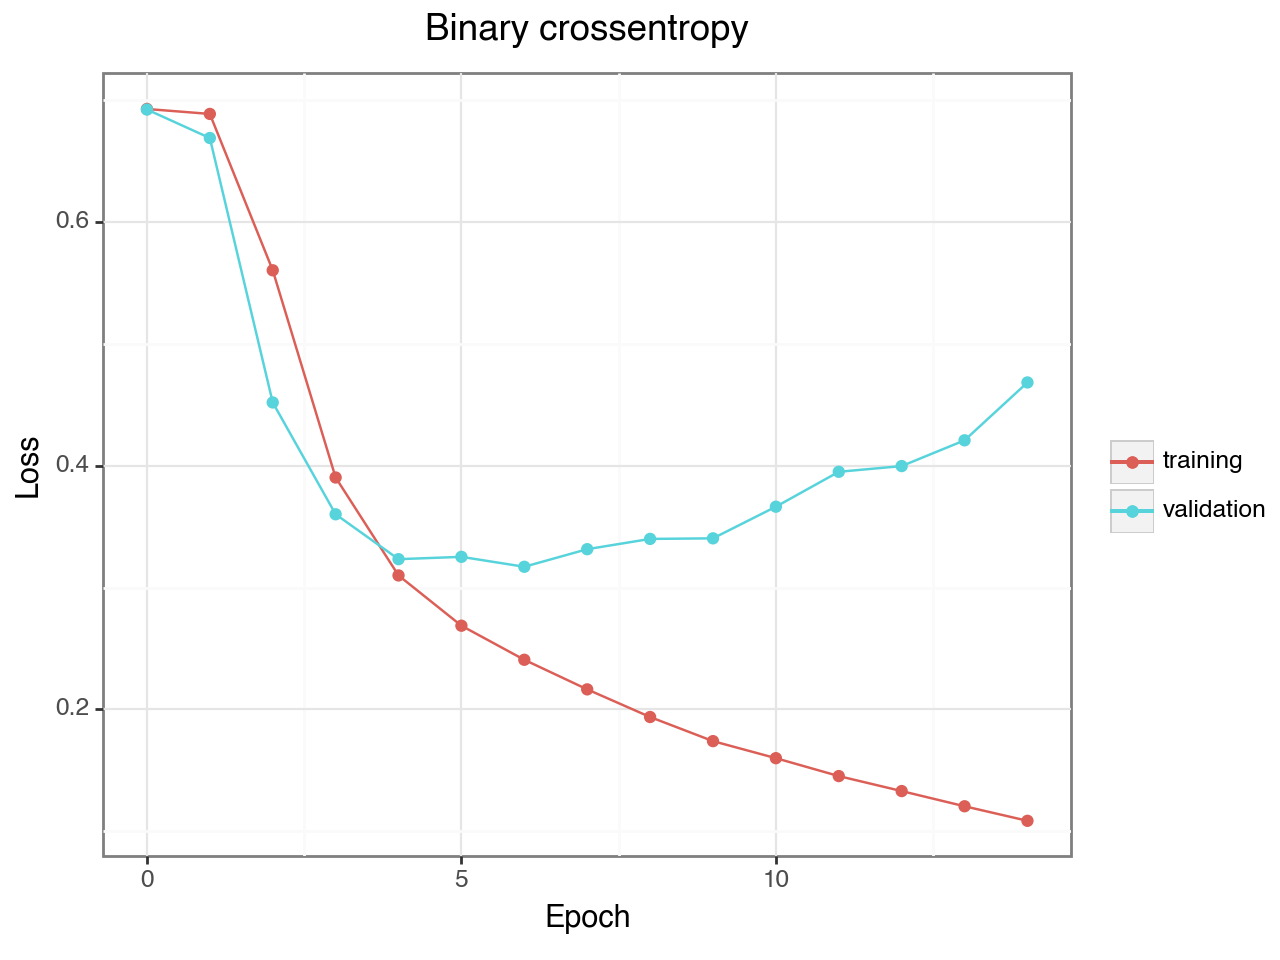

<Figure Size: (640 x 480)>

In [18]:
sc.plot

In [19]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'auc', 'color':"'training'"},
                 main_title='Area under curve',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_auc', color = "'validation'")))

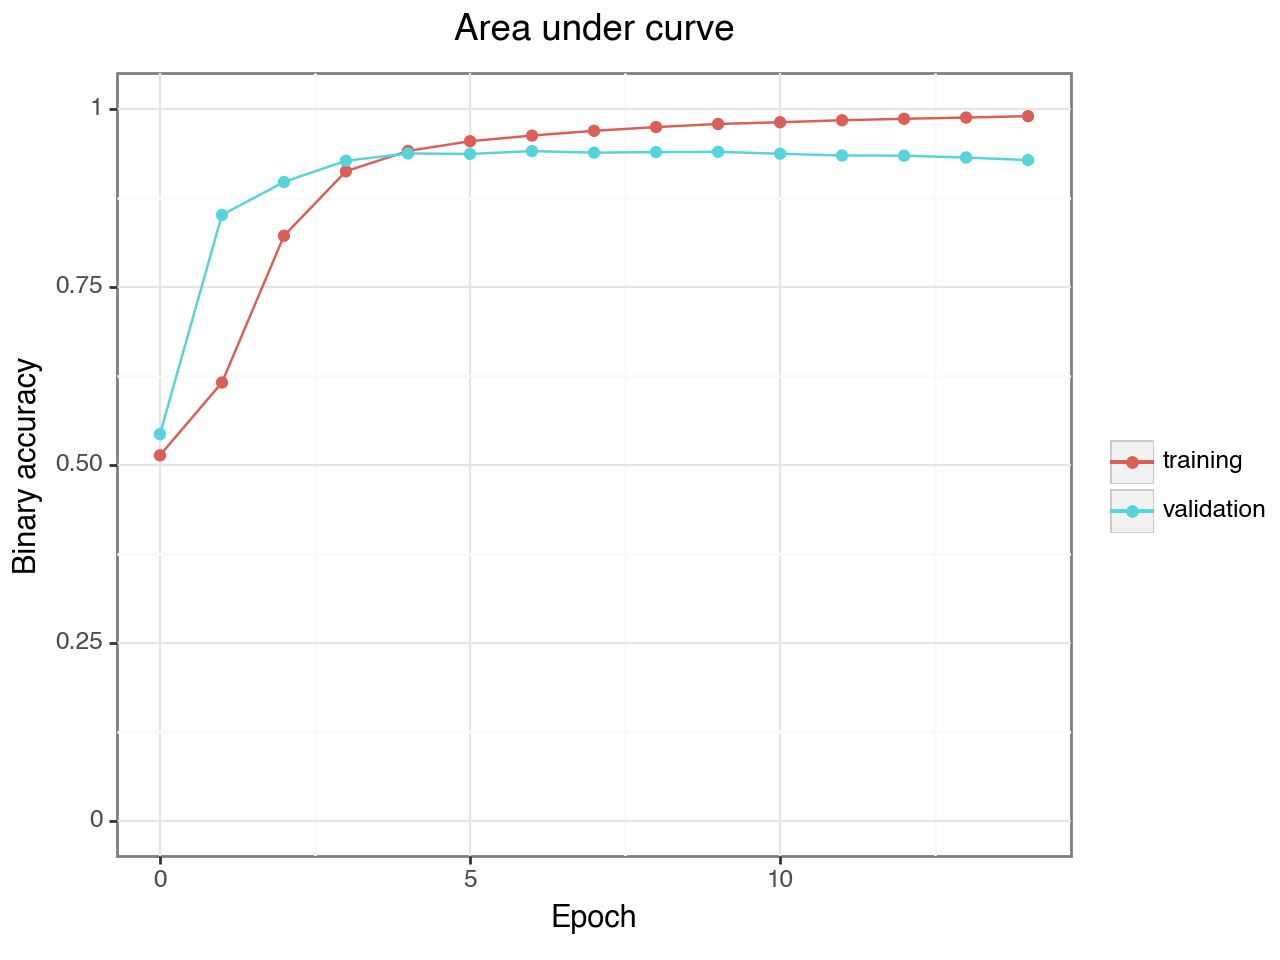

<Figure Size: (640 x 480)>

In [20]:
sc.plot + ylim(0,1)

In [21]:
sc = ScatterPlot(data_set=df,
                 aes = {'x':'epoch', 'y':'binary_accuracy', 'color':"'training'"},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title='',
                 line = geom_line()
              )

sc.add_gg_object(geom_point(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))
sc.add_gg_object(geom_line(df, aes(x = 'epoch', y = 'val_binary_accuracy', color = "'validation'")))

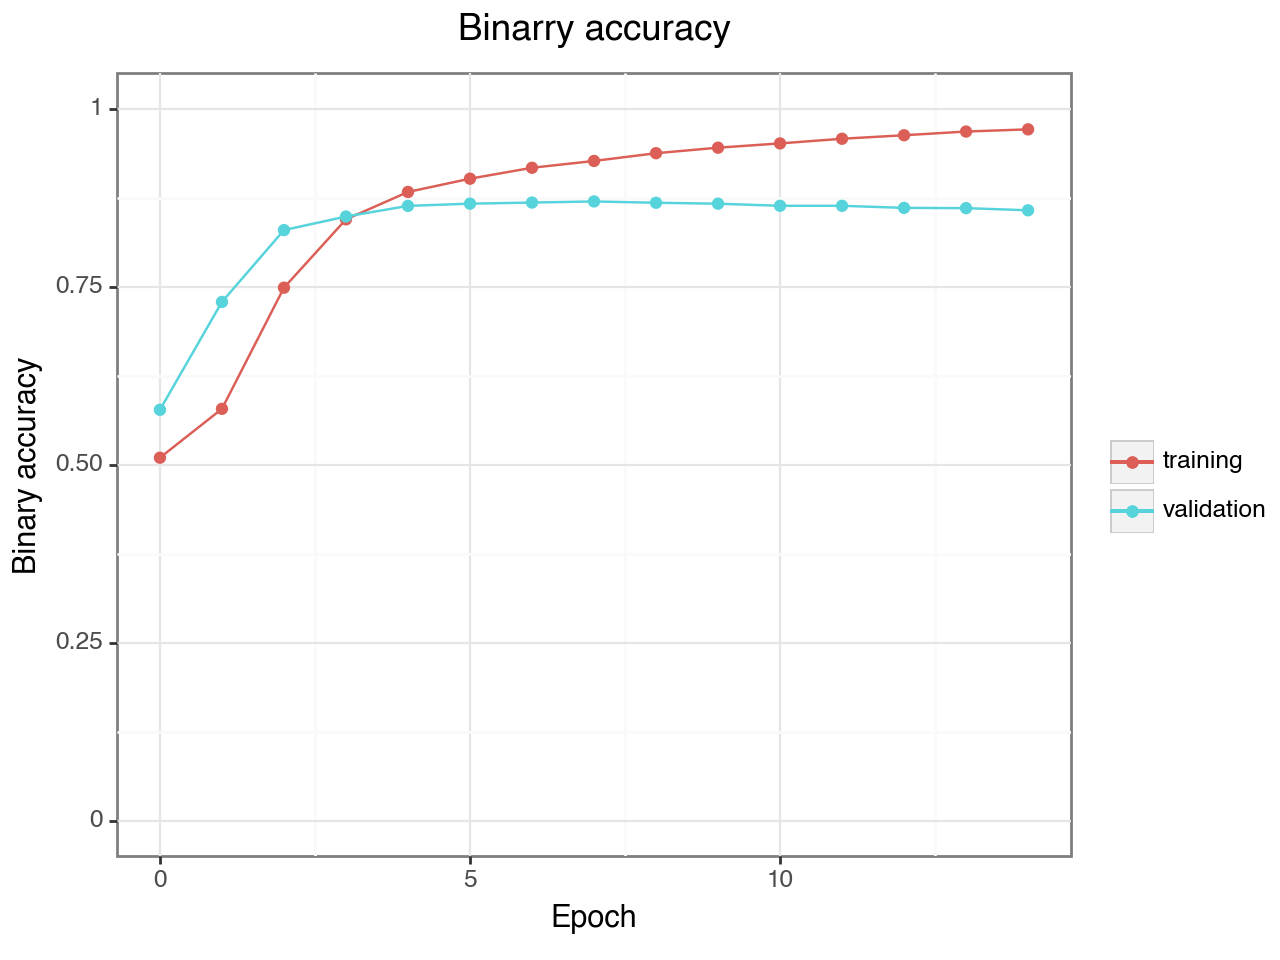

<Figure Size: (640 x 480)>

In [22]:
sc.plot + ylim(0,1)

# Extract embeddings

In [23]:
embedding_vectors = model.layers[0].weights[0]

In [24]:
token2vector = {}
for index, vector in enumerate(embedding_vectors):
    token2vector[index2token.get(str(index))] = vector.numpy()

In [25]:
token2vector_df = pd.DataFrame.from_dict({'token':list(token2vector.keys()), 'em_vector': list(token2vector.values())})

In [26]:
token2vector_df

,token,em_vector
0,aag,"[0.020854395, 0.0027971815, -0.0071633817, -0...."
1,aaron,"[0.007718122, -0.046545982, -0.031821802, 0.00..."
2,ab,"[-0.043985788, -0.0015943462, 0.037903894, 0.0..."
3,abandon,"[0.019348752, 0.0023158921, 0.03409241, 0.0003..."
4,abandoned,"[-0.03090839, 0.02117983, -0.06526426, 0.01789..."
...,...,...
17337,zu,"[-0.0507184, 0.032143723, 0.0335977, 0.0294459..."
17338,zucker,"[4.153756e-05, -0.004098017, -0.009099646, 0.0..."
17339,zulu,"[-0.0012136848, -0.025262466, -0.0057214173, 0..."
17340,zuniga,"[-0.012155343, -0.037794985, -0.0021983613, 0...."


In [27]:
token2vector_tsne = pd.DataFrame.from_dict(token2vector, orient='index')

In [28]:
token2vector_tsne

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
aag,0.020854,0.002797,-0.007163,-0.042946,0.045807,0.007172,-0.050354,-0.015113,0.040646,0.002593,...,-0.011473,-0.023251,-0.011434,0.013758,-0.030756,-0.001293,-0.016507,-0.033279,0.008150,0.033861
aaron,0.007718,-0.046546,-0.031822,0.000733,0.008493,-0.041792,-0.037602,-0.019292,0.011969,0.008897,...,-0.041132,0.048154,-0.027533,-0.016481,0.032794,-0.010955,-0.013143,-0.009975,-0.026548,-0.026997
ab,-0.043986,-0.001594,0.037904,0.014160,0.023707,0.019785,-0.026941,0.011312,-0.027394,0.039511,...,0.017146,0.041846,0.030484,-0.004997,0.003853,-0.000171,-0.043130,-0.042415,-0.043628,-0.013682
abandon,0.019349,0.002316,0.034092,0.000308,0.012879,-0.040725,0.013287,-0.011337,-0.050848,-0.013045,...,-0.000355,0.020793,0.049477,-0.036319,0.045066,-0.039595,0.030554,0.013153,-0.036109,0.036201
abandoned,-0.030908,0.021180,-0.065264,0.017899,0.007594,0.074965,-0.014875,-0.035635,-0.034663,0.003007,...,-0.054059,-0.042865,0.024907,0.025193,0.058346,-0.009768,0.018997,0.025216,0.006799,0.003554
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zu,-0.050718,0.032144,0.033598,0.029446,0.012787,0.000940,0.008657,-0.049555,-0.044919,0.034967,...,0.048830,-0.019818,0.028146,0.008664,0.036850,0.009224,-0.040921,0.044042,-0.035379,-0.018279
zucker,0.000042,-0.004098,-0.009100,0.033973,-0.027974,0.007559,-0.046291,0.022768,0.017145,-0.015970,...,0.015457,-0.020377,-0.029408,-0.024610,0.048115,-0.014665,0.026178,-0.033241,-0.038946,0.044223
zulu,-0.001214,-0.025262,-0.005721,0.017844,-0.046364,0.018113,-0.054294,-0.037330,-0.003121,-0.003012,...,0.021098,-0.019112,0.002136,-0.027868,0.006387,0.024292,0.001587,-0.023530,-0.048198,-0.011401
zuniga,-0.012155,-0.037795,-0.002198,0.017245,0.004227,-0.026142,-0.021254,0.033951,0.041326,-0.018344,...,0.047134,-0.041302,0.020310,-0.020910,0.050903,0.027297,0.046206,-0.035704,-0.035940,-0.014372


In [29]:
from sklearn.manifold import TSNE

In [30]:
tsne_transformer = TSNE(n_components=2, verbose=1, random_state=123)

In [31]:
z = tsne_transformer.fit_transform(token2vector_tsne) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 17342 samples in 0.003s...
[t-SNE] Computed neighbors for 17342 samples in 1.751s...
[t-SNE] Computed conditional probabilities for sample 1000 / 17342
[t-SNE] Computed conditional probabilities for sample 2000 / 17342
[t-SNE] Computed conditional probabilities for sample 3000 / 17342
[t-SNE] Computed conditional probabilities for sample 4000 / 17342
[t-SNE] Computed conditional probabilities for sample 5000 / 17342
[t-SNE] Computed conditional probabilities for sample 6000 / 17342
[t-SNE] Computed conditional probabilities for sample 7000 / 17342
[t-SNE] Computed conditional probabilities for sample 8000 / 17342
[t-SNE] Computed conditional probabilities for sample 9000 / 17342
[t-SNE] Computed conditional probabilities for sample 10000 / 17342
[t-SNE] Computed conditional probabilities for sample 11000 / 17342
[t-SNE] Computed conditional probabilities for sample 12000 / 17342
[t-SNE] Computed conditional probabilities for sam

In [32]:
token2vector_tsne['comp-0'] = z[:,0]
token2vector_tsne['comp-1'] = z[:,1]

In [33]:
list_of_animals = [animal.lower() for animal in pd.read_csv("/Users/lukaszmaczewski/Documents/Learning/DeepNeuralNetworks/keras/data/animals.csv").name.to_list()]

In [34]:
tsne_df = token2vector_tsne.sample(n=5000).reset_index()
# tsne_df = token2vector_tsne.reset_index()
tsne_df.rename(columns={'index':'token'}, inplace=True)
tsne_df['labels'] = 'background'
tsne_df.loc[[x in list_of_animals for x in tsne_df.token],['labels']]  = 'animals'

In [35]:
tsne_df

,token,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,comp-0,comp-1,labels
0,shocks,-0.022617,0.022489,-0.001353,0.017008,-0.037145,-0.041304,-0.039810,-0.005956,0.022906,...,0.012220,-0.006638,0.027274,-0.002755,-0.003085,-0.012022,0.005585,40.264851,35.382637,background
1,deborah,-0.022329,0.037322,0.036141,0.007542,-0.009198,-0.035090,0.024746,-0.027192,0.008215,...,-0.021950,-0.005426,0.007691,-0.022708,0.025066,0.025654,-0.017923,35.814182,-38.935493,background
2,thespian,-0.024143,-0.025615,0.031331,-0.034539,0.039310,0.044399,-0.021939,0.024692,0.041683,...,0.038725,-0.052554,0.033235,-0.003054,-0.015955,0.014347,0.020964,21.285791,13.226933,background
3,jar,-0.039363,-0.034882,0.055236,-0.042804,-0.047164,-0.007880,-0.000272,0.054844,0.048080,...,-0.036407,0.027678,-0.018608,0.019274,0.034049,-0.015437,-0.029850,17.114098,0.491991,background
4,deterioration,0.029188,0.039743,0.029191,0.035056,-0.001062,0.013773,-0.012084,-0.038987,-0.026431,...,0.040307,-0.019512,-0.031479,0.024720,-0.046475,-0.038693,-0.006803,30.017117,-42.680420,background
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,inn,-0.011262,-0.015069,0.041637,0.043652,0.039604,0.042953,0.051456,-0.046520,-0.041071,...,0.000120,-0.029980,-0.054626,0.041773,0.004316,0.030426,0.045153,-26.692137,-44.984394,background
4996,falters,-0.030349,-0.001973,0.035744,-0.008195,0.044716,-0.016784,-0.006714,-0.035487,0.012275,...,-0.029852,-0.012367,0.011478,0.031669,-0.036625,-0.048871,0.045836,-0.130911,7.266138,background
4997,bronte,-0.034429,-0.007129,-0.037250,0.027368,0.008241,-0.046183,0.031137,-0.040628,-0.015078,...,-0.014818,0.022087,-0.005320,-0.031234,0.034211,0.017606,-0.019232,-11.648749,-18.241381,background
4998,storytelling,-0.007023,-0.050356,-0.006812,-0.036593,-0.011349,-0.019373,0.004267,0.053947,-0.050062,...,0.027380,-0.000952,0.041763,-0.007347,0.020319,-0.005872,-0.023691,-30.231056,51.731941,background


In [36]:
sc = ScatterPlot(data_set=tsne_df,
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'labels'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

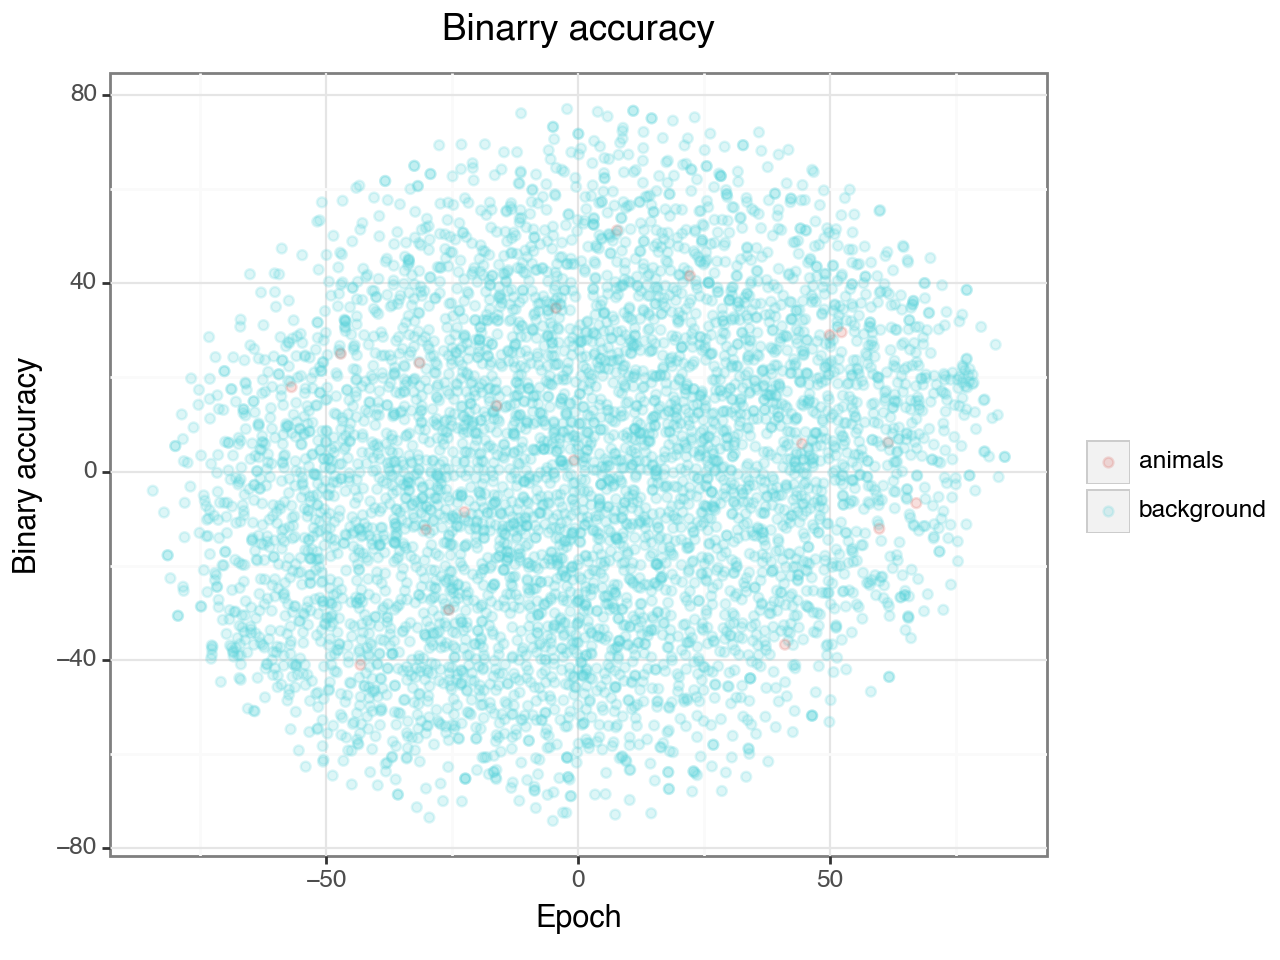

<Figure Size: (640 x 480)>

In [37]:
sc.plot

In [38]:
sc = ScatterPlot(data_set=tsne_df[tsne_df.labels == 'animals'],
                 aes = {'x':'comp-0', 'y':'comp-1', 'color':'token'},
                 points_features={'alpha':0.2},
                 main_title='Binarry accuracy',
                 x_label='Epoch',
                 y_label='Binary accuracy',
                 legend_title=''
              )

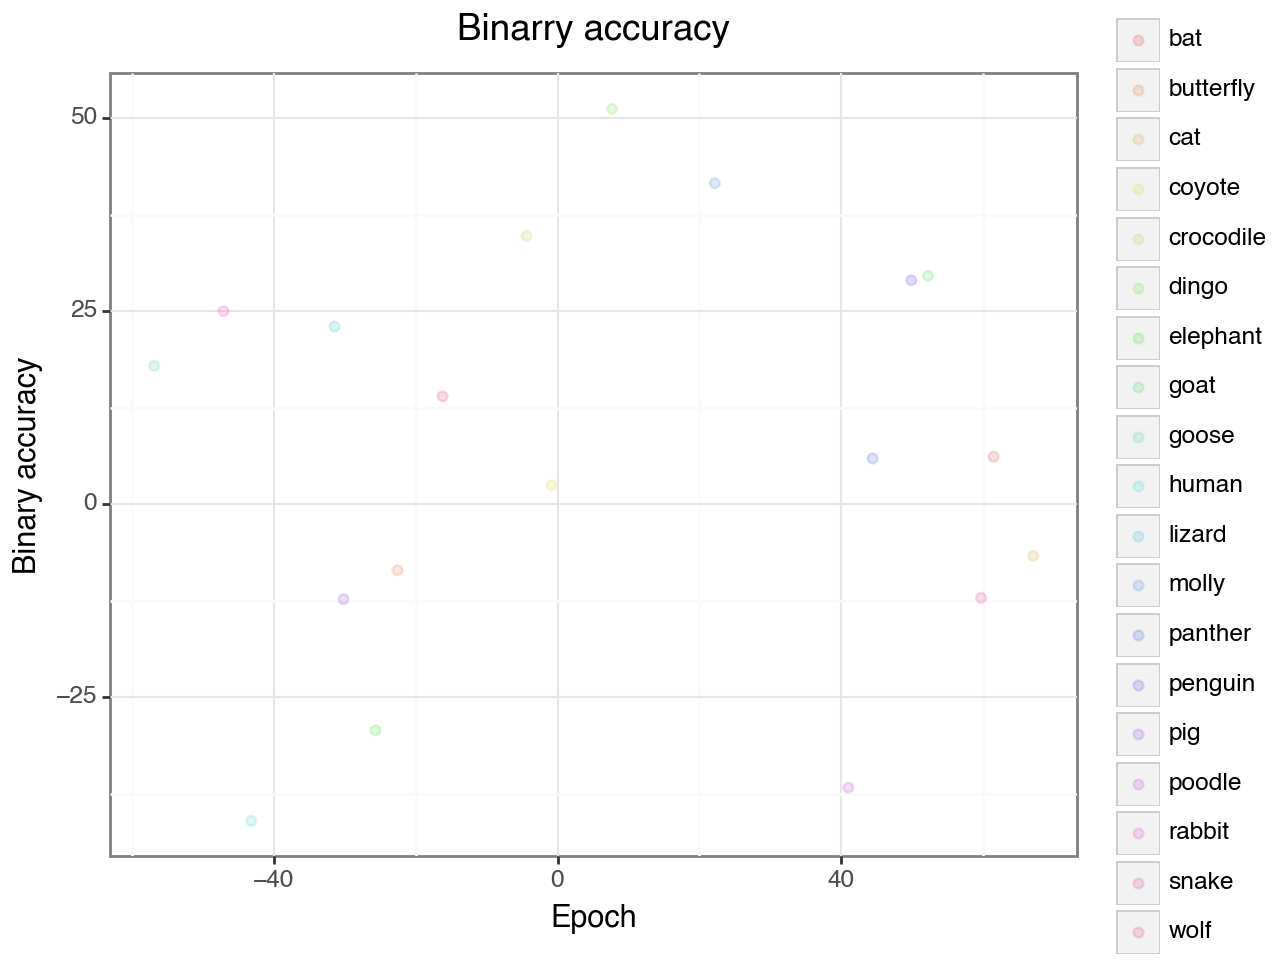

<Figure Size: (640 x 480)>

In [39]:
sc.plot

In [40]:
tsne_df[tsne_df.labels == 'animals'].sort_values(by = ['comp-0', 'comp-1'])

,token,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,comp-0,comp-1,labels
2388,goose,-0.049753,-0.038356,-0.053480,-0.027908,-0.015646,-0.041108,-0.041936,-0.027919,-0.017510,...,0.027377,-0.000979,0.022568,0.041388,0.039464,-0.006524,0.041788,-56.865791,17.932932,animals
2737,rabbit,-0.052329,-0.018236,-0.029162,-0.016016,0.014958,-0.022439,-0.001032,0.015692,-0.039212,...,0.018470,0.046603,0.016538,0.002771,0.032659,-0.017347,0.025716,-47.089951,24.999500,animals
4259,human,-0.003123,0.035840,0.022793,0.038582,-0.008695,0.052317,-0.035738,0.021263,0.030465,...,0.008450,0.047937,-0.064253,0.061148,0.026334,-0.002269,-0.003023,-43.195469,-41.038048,animals
4463,lizard,0.013684,0.001035,-0.004525,-0.008846,-0.020959,-0.006880,0.019962,0.027653,-0.035013,...,-0.003096,-0.040005,-0.038573,-0.046583,-0.026136,-0.014945,-0.045479,-31.455776,23.029207,animals
2890,pig,-0.000063,-0.016043,-0.029938,0.005331,0.013376,-0.004508,0.023621,-0.028978,0.026235,...,-0.019291,-0.007088,-0.025047,-0.049366,0.012866,-0.019140,0.028834,-30.170189,-12.323435,animals
4227,elephant,-0.020770,0.007008,-0.020289,0.005857,0.056784,0.056804,0.035806,-0.034577,-0.011060,...,0.034687,0.042348,-0.034646,-0.003784,0.022639,0.026547,-0.042756,-25.649767,-29.325438,animals
2485,butterfly,0.008707,0.001052,-0.023565,-0.027244,-0.019240,0.050622,-0.009730,0.019691,-0.002512,...,0.015780,-0.029143,0.031015,-0.004577,0.006892,0.028316,-0.026478,-22.563759,-8.572083,animals
3762,wolf,0.044801,-0.030052,-0.026129,-0.042419,0.033024,-0.033235,-0.035534,0.036694,-0.025384,...,-0.017759,-0.000584,0.036226,0.030407,-0.030527,0.030766,-0.041382,-16.216301,13.964302,animals
2587,crocodile,-0.038396,0.031039,0.024844,0.030654,-0.012808,-0.029042,-0.029879,-0.023427,-0.010003,...,-0.012284,0.032028,-0.032792,0.010365,-0.015466,0.013375,0.030951,-4.383351,34.736835,animals
2818,coyote,0.020862,-0.044056,0.020679,0.010311,-0.025853,-0.001859,0.033833,0.026823,-0.020028,...,0.002873,0.033210,-0.044117,-0.033654,-0.033706,0.001684,-0.004424,-0.837047,2.415882,animals
